In [55]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.integrate import odeint

# Glider Plane

Let's say we have some glider that flies in a vertical plane (say, the x-z plane, meaning it cannot turn left/right).

Let $\theta$ be the angle of the trajectory relative to the horizontal and $v$ be the velocity of the plane.

There are 3 forces acting on our plane:

$
\begin{align}
\text{Weight} \rightarrow F_g &= mg  \tag{1}\\
\text{Lift} \rightarrow F_L &= \frac{1}{2} \rho A C_z v^2 \tag{2}\\
\text{Drag} \rightarrow F_D &= \frac{1}{2} \rho A C_x v^2 \tag{3}\\
\end{align}
$

Where $m$ is the mass of the plane (in kg), $\rho$ is the density of air, $A$ is the cross sectional area of the plane, $C_z$ is the aerodynamic lift coefficient, and $C_x$ is the aerodynamic drag coefficient. Note that we are assuming the drag and lift are proportional to the square of the velocity.

While we could potentially write out the equations of motion in terms of traditional $x$ and $z$ positions, it will be better for us if we instead consider the tangential and centripetal components of the motion of our glider. The reason being, for the tangential motion, we only care about the angle $\theta$, the weight vector, and the drag vector since the lift vector does not change the tangential acceleration of the glider. For the centripetal motion, we only care about the angle $\theta$, the weight vector, and the lift vector since the drag vector does not change the centripetal acceleration of the glider.

The equations of motion are then:

$$
\begin{align}
m\frac{dv}{dt} &= -mg\sin\theta - \frac{1}{2} \rho A C_x v^2 \ \ \ \text{(tangential)} \tag{4}\\
\\
mv\frac{d\theta}{dt} &= -mg\cos\theta + \frac{1}{2} \rho A C_z v^2 \ \ \ \text{(centripetal)} \tag{5}
\end{align}
$$

If we have the specific case when Lift = Weight:

$$
\begin{align}
\frac{1}{2}\rho A C_z v_0^2 &= mg  \tag{6} \\
\\
v_0^2 &= \frac{2mg}{\rho A C_z} \tag{7} \\
\\
v_0 &= \sqrt{\frac{2mg}{\rho A C_z}} \tag{8}
\end{align}
$$

Our system is a bit easier to work with if we work in *dimensionless* units. To do this, we need to alter our equations by performing a change of variables so that we have a unitless variable that describes the velocity and a unitless variable that describes the time.

First, let the instantaneous velocity of our plane be:

$$
v = v_0\gamma \tag{9}
$$

Next, let's define the time to be:

$$
t = \frac{v_0}{g}t_N \tag{10}
$$

From this, we can see:

$$
\begin{align}
dv &= v_0d\gamma \tag{11} \\
\\
dt &= \frac{v_0}{g}dt_N \tag{12}
\end{align}
$$

If we combine our new unitless variables with our previous equations, after some algebra (feel free to check my math if you wish!), we arrive at:

$$
\begin{align}
\\
\frac{d\theta}{dt_N} &= \frac{\gamma^2 - \cos\theta}{\gamma} \tag{13}\\
\\
\frac{d\gamma}{dt_N} &= -\sin\theta - D\gamma^2 \tag{14}
\end{align}
$$

Where $D$ is the ratio of the aerodynamic drag coefficient divided by the aerodynamic lift coefficient: $D = \frac{C_x}{C_z}$, or the "drag-to-lift ratio".

If you were to design a glider, your goal would be to maximize the lift while minimizing the drag; or, to make $D$ as small as possible.

Our goal here is to consider the solutions of this model and their relationship to the actual flight of the glider.

The above is a system of differential equations we want to solve. The Scipy library is perfectly equipped to help us find solutions, but we first need to define a function that we can use moving forward.

In [56]:
def diffyq(input, t ,D):
    theta, gamma = input    # input values for theta and gamma
    dangledt = (gamma**2 - np.cos(theta)) / gamma   # 1st diffy q equation
    dvdt = -np.sin(theta) - D * gamma**2            # 2nd diffy q equation
    return [dangledt, dvdt]

## Special Case: $D =  0$

We can first look at solutions for the special case when $D = 0$.

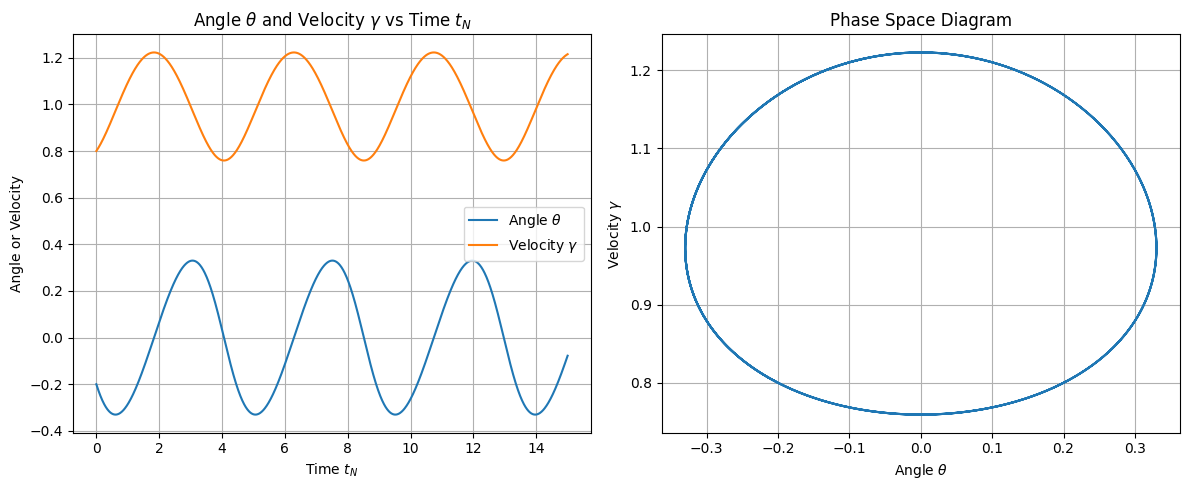

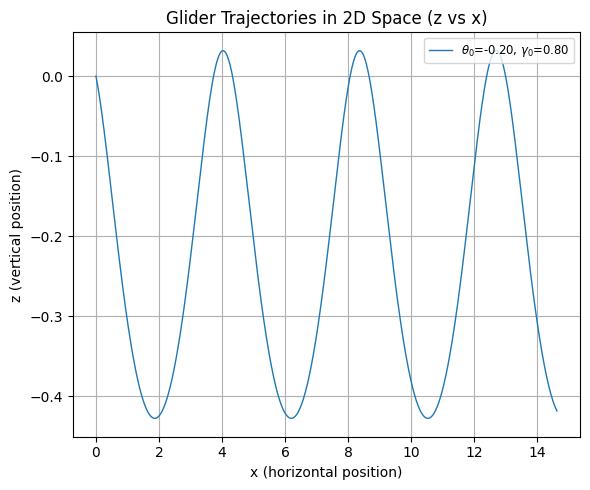

In [57]:
# Ratio of drag to lift coefficient
D = 0.00

# initial values for [theta, gamma]
y0 = [-0.2, 0.8]  # Change these to alter plots below!

# time to solve over
t = np.linspace(0, 15, 1500)

# Calc solutions using odeint by calling diffyq and using input, t, and D
solutions = odeint(diffyq, y0, t, args=(D,))

theta_values = solutions[:, 0]
v_values = solutions[:, 1]

# Create side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Left: θ and γ vs time
ax1.plot(t, theta_values, label=r'Angle $\theta$')
ax1.plot(t, v_values, label=r'Velocity $\gamma$')
ax1.set_xlabel(r'Time $t_N$')
ax1.set_ylabel('Angle or Velocity')
ax1.set_title(r'Angle $\theta$ and Velocity $\gamma$ vs Time $t_N$')
ax1.legend()
ax1.grid(True)

# Right: Phase space plot
ax2.plot(theta_values, v_values, label='Phase Space')
ax2.set_xlabel(r'Angle $\theta$')
ax2.set_ylabel(r'Velocity $\gamma$')
ax2.set_title('Phase Space Diagram')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Updated ODE system to include x and z position
def full_diffyq(input, t, D):
    theta, gamma, x, z = input
    dtheta_dt = (gamma**2 - np.cos(theta)) / gamma
    dgamma_dt = -np.sin(theta) - D * gamma**2
    dx_dt = gamma * np.cos(theta)
    dz_dt = gamma * np.sin(theta)
    return [dtheta_dt, dgamma_dt, dx_dt, dz_dt]

# Plot z vs x trajectories
plt.figure(figsize=(6, 5))

ini = [y0[0], y0[1], 0.0, 0.0]  # Start at origin
sol = odeint(full_diffyq, ini, t, args=(D,))
x_vals = sol[:, 2]
z_vals = sol[:, 3]

plt.plot(x_vals, z_vals, lw=1, label=fr"$\theta_0$={y0[0]:.2f}, $\gamma_0$={y0[1]:.2f}")

plt.xlabel('x (horizontal position)')
plt.ylabel('z (vertical position)')
plt.title('Glider Trajectories in 2D Space (z vs x)')
#plt.gca().invert_yaxis()  # downward motion is more intuitive
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize='small', loc='upper right')
plt.show()

In the above plots, we see that for the specific example when $y0 = [-0.2, 0.8]$ and $D = 0.00$, the plane travels forward oscillating up and down. As it oscillates, the speed it travels at increases (as it descends) until the lift force increases enough to cause the plane to shift it's angle upwards. It then travels upwards and slows down as it ascends, causing the angle to tip downards again.

The 2nd plot (phase space diagram) shows the relationship between the angle of the plane and the velocity of the plane as it travels.

In the 3rd plot, we see the physical 2-D trajectory of the glider. Feel free to change the initial conditions to see how it impacts the physical trajectory.  

# Conceptual Questions 1

1. We can choose specific input for our initial angle ($\theta$) and unitless velocity ($\gamma$) terms. Explain what happens if we enter $\theta = 0.0$ and $\gamma = 1.0$

2. Keep the initial angle ($\theta$) equal to 0. Run the script with the following velocity terms: 1.5, 1.6, 1.7, 1.8. Explain what happens to the airplane.

<font color = orange>
Double click and type your answers here!


We can also create a 3-d representation of the phase space plot by plotting the result on the surface of a 3-d cylinder.

In [58]:
# Time span for integration
t = np.linspace(0, 10, 500)

# Initial conditions grid
theta0_vals = np.linspace(-np.pi, np.pi, 10)
gamma0_vals = np.linspace(0.2, 2.0, 10)

# Store trajectories
x_traj = []
y_traj = []
z_traj = []

for theta0 in theta0_vals:
    for gamma0 in gamma0_vals:
        sol = odeint(diffyq, [theta0, gamma0], t, args=(0.0,))
        theta_vals = np.mod(sol[:, 0] + np.pi, 2 * np.pi) - np.pi  # wrap to [-π, π]
        gamma_vals = sol[:, 1]

        # Convert to cylindrical coordinates with radius = 1
        x_vals = np.cos(theta_vals)
        y_vals = np.sin(theta_vals)
        z_vals = gamma_vals

        x_traj.append(x_vals)
        y_traj.append(y_vals)
        z_traj.append(z_vals)

# Create 3D plot of trajectories on the cylinder
fig = go.Figure()

for x, y, z in zip(x_traj, y_traj, z_traj):
    fig.add_trace(go.Scatter3d(
        x=x, y=y, z=z,
        mode='lines',
        line=dict(width=2),
        showlegend=False
    ))

# Add a transparent cylinder surface for context
theta_cylinder = np.linspace(-np.pi, np.pi, 100)
gamma_cylinder = np.linspace(0, 2.5, 50)
theta_cyl, gamma_cyl = np.meshgrid(theta_cylinder, gamma_cylinder)

x_cyl = np.cos(theta_cyl)
y_cyl = np.sin(theta_cyl)
z_cyl = gamma_cyl

fig.add_trace(go.Surface(
    x=x_cyl,
    y=y_cyl,
    z=z_cyl,
    opacity=0.15,
    colorscale='Greys',
    showscale=False
))

# Set scene and layout
fig.update_layout(
    scene=dict(
        xaxis_title='cos(θ)',
        yaxis_title='sin(θ)',
        zaxis_title='γ',
        aspectmode='manual',
        aspectratio=dict(x=1, y=1, z=1.5)
    ),
    title='2-D Phase Space on a 3D Cylinder (r = 1, D = 0)'
)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

The different lines represent different possible phase plots for separate initial conditions (starting angle and velocity).

# General Case: $D \ne 0$



In the real world, we cannot ignore drag. This unfortunately makes our equation more challenging to work with, but we can look at a specific simple(ish) case: steady-glide.

Consider equations 13 and 14 again. If our airplane is in a steady-glide, then the plane is traveling at a constant speed at a constant angle that is declined relative to the horizontal. This means the left hand side of equations 13 and 14 are equal to 0, and hence, the lift force and drag force on the plane are balanced. If we can measure this declination angle, we can approximate the ratio of drag-to-lift. We can set equations 13 and 14 equal to eachother and solve for $D$:

$$
\begin{align}
D &=\frac{C_x}{C_z} = \tan{\theta}\tag{15}
\end{align}
$$

Typically we hear about "lift-to-drag", not "drag-to-lift", so we would want:

$$
\begin{align}
\frac{1}{D} &= \frac{C_z}{C_x} = \frac{1}{\tan{\theta}}\tag{16}
\end{align}
$$

In this form (equation 16), we then see planes with "better" lift-to-drag ratios having smaller angles of declination when in steady-glide.

**Important**: equations 15 and 16 are only valid under the steady-glide condition. If the velocity or angle is changing over time, then the plane is not in steady-glide!

# Experiment

We can find [many different paper airplane designs online](https://www.foldnfly.com/#/1-1-1-1-1-1-1-1-2-1). Some of these designs claim to be better for distance (steady-gliding), but *are they*?

To test this, choose 3 designs to build. To test the airplanes, we will need to video record their flights and use video tracking (loggerpro) to track the change in position over time.

To do this, we will want a large space for the airplane to travel (possibly the auditorium?) and to start the flight from a decent height (maybe a ladder?). Have a labmate record the flight trajectory with their phone, then use loggerpro to track the position of the plane over time.

Remember to keep the following things in mind:

1. We want the velocity of the plane to be as stable as possible. It shouldn't be speeding up, slowing down, drifting sideways, or wobbling as it glides. If it does, discard the attempt and try again.

2. Don't throw the airplane too hard when launching, we want it to find its steady-glide condition as early as possible so we can record it over a few seconds at least.

Consider the following questions as you attempt to answer which aircraft has the best lift-to-drag coefficient:

1. What value of $\theta$ did you measure for your airplane? What is the 95% CI around the value? How did you obtain the value?

2. What was the velocity of the glider in its steady-glide state? Again, what is the 95% CI around the value and how did you obtain it?

3. Do any of the airplanes you made peform better or worse than the others, or are they statistically indistinguishable? Defend your answer.  